
The dataset was orginally uploaded on UCI machine learning arepository .Over 0.5 million transactions from a UK-based online retail store.

We will use a randomly sampled 20% subset of this dataset downloaded through Datacamp segmentation's course.

In [1]:
import pandas as pd

In [2]:
online=pd.read_csv("Ch1-data/online.csv")

In [3]:
online.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [4]:
#to delete the unnamed colour, couldnt do through index_col=0
online=online.loc[:, ~online.columns.str.contains('^Unnamed')]

In [5]:
#Top 5 rows
online.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


### Assigning acquisition month cohort


In [6]:
online.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [7]:

from datetime import datetime
online['InvoiceDate']=pd.to_datetime(online['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')

In [8]:
import datetime as dt

def get_month(x):
    return (dt.datetime(x.year,x.month,1))

In [9]:
#create daily cohorts based on the day each customer has made their first transaction
online['InvoiceMonth']=online['InvoiceDate'].apply(get_month)

In [10]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01


In [11]:
#grouping  cohort based on the invoice in different months
grouping=online.groupby('CustomerID')['InvoiceMonth']


In [12]:
#to assign transform function to find a smallest inoicemonth  to the dataset
online['CohortMonth'] = grouping.transform('min')

In [13]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [14]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

## Assign time offset value

In [15]:
# Get the integers for date parts from the `Invoicemonth` column
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth') 
# Get the integers for date parts from the `Cohortmonth` column
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
#Now we will use these integer values to calculate business metrics for our time cohorts!

In [16]:
# Calculate difference in years
years_diff = invoice_year -cohort_year

# Calculate difference in months
months_diff = invoice_month-cohort_month

In [17]:
#+1 added to have one instead of 0 for easier interpretation
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()
#We have successfully assigned the monthly time offset to each transaction and can use it for running daily cohort analysis!

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


### To create a pivot table

In [18]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [19]:
#count the number of customers in each group
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [20]:
cohort_data = cohort_data.reset_index()

In [21]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex', 
                                  values='CustomerID')

In [22]:
cohort_counts
#Now each customer belongs to a monthly acquisition cohort that you can use for further analysis

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate cohort metrics


The retention matrix shows how many customers from each of the cohort have returned in the subsequent months.
the first step is to select the first column which is the total number of customers in the cohort.
Next, we calculate the ratio of how many of these customers came back in the subsequent months which is the retention rate.
(the first month's retention logically 100% for hte first month's retention)

### Calculate Rention rate

In [23]:
#Store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

In [24]:
#Divide all values in the cohort_counts table by cohort_sizes
#Retention gives you the percentage of active customers compared to the total number of customers.
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [25]:
retention.round(3)*100
#We can now compare the retention rate over time and across cohorts to evaluate the health of our customers shopping habits.


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualisation of retention metric

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, #use to anchor the colour map nad make sure the outliers do not ipact the visualisation
            vmax = 0.5, #use to anchor the colour map nad make sure the outliers do not ipact the visualisation
            cmap = 'YlGnBu')

plt.show()

<Figure size 1000x800 with 2 Axes>

### Create average quantity metrics (for each cohort)

In [27]:
#tO Create a pivot table
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', 
                                     columns='CohortIndex', 
                                     values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualisation of average quantity metric

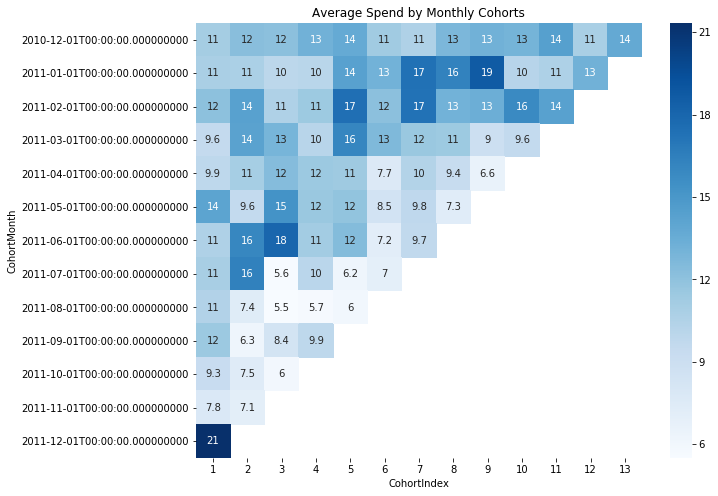

In [28]:
# Import seaborn package as sns
import seaborn as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=average_quantity, annot=True, cmap='Blues')
plt.show()

## We will now create daily cohorts based on the day each customer has made their first transaction.

In [29]:
df=online.copy()

# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month,x.day) 

In [30]:
# Create InvoiceDay column
df['InvoiceDay'] = df['InvoiceDate'].apply(get_day) 

In [31]:
# Group by CustomerID and select the InvoiceDay value
grouping = df.groupby('CustomerID')['InvoiceDay'] 

In [32]:
# Assign a minimum InvoiceDay value to the dataset
df['CohortDay'] = grouping.transform('min')

In [33]:
# View the top 5 rows
print(df.head())

   InvoiceNo StockCode                      Description  Quantity  \
0     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom   2011-10-01   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom   2011-11-01   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom   2011-07-01   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom   2011-11-01   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom   2011-05-01   

  CohortMonth  CohortIndex InvoiceDay  CohortDay  
0  2011-04-01            7 2011-10-25 2011-04-11  
1  2011-09-01       

In [34]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month,invoice_day = get_date_int(df,'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year,cohort_month,cohort_day = get_date_int(df,'CohortDay')

In [35]:
# Calculate difference in years
years_diff = invoice_year -cohort_year

# Calculate difference in months
months_diff = invoice_month-cohort_month

# Calculate difference in days
days_diff = invoice_day- cohort_day

# Extract the difference in days from all previous values
df['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
print(df.head())
#We have successfully assigned the daily time offset to each transaction and can use it for running daily cohort analysis!

   InvoiceNo StockCode                      Description  Quantity  \
0     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom   2011-10-01   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom   2011-11-01   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom   2011-07-01   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom   2011-11-01   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom   2011-05-01   

  CohortMonth  CohortIndex InvoiceDay  CohortDay  
0  2011-04-01          195 2011-10-25 2011-04-11  
1  2011-09-01       

In [36]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
# Count the number of unique values per customer ID
cohort_data2 = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

In [37]:
# Create a pivot 
cohort_counts2 = cohort_data2.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [38]:
# Select the first column and store it to cohort_sizes
cohort_sizes2 = cohort_counts2.iloc[:,0]

In [39]:
# Divide the cohort count by cohort sizes along the rows
retention2 = cohort_counts2.divide(cohort_sizes, axis=0)

### Create average price metrics (for each cohort)

In [40]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth','CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01   3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01-01   3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02-01   3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03-01   3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04-01   3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05-01   3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06-01   2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07-01   3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08-01   2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09-01   2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10-01   2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

### Visualisation of average price metric

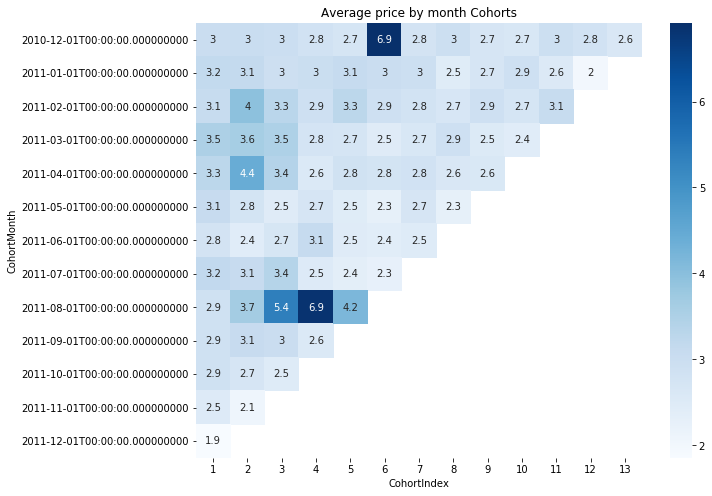

In [41]:
# Import seaborn package as sns
import seaborn as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Average price by month Cohorts')

# Create the heatmap
sns.heatmap(data=average_price, annot=True, cmap='Blues')
plt.show()